In [1]:
# source "C:/Users/leand/venvs/pns/Scripts/activate"
# python -m ipykernel install --user --name=pns --display-name "pns"

import os
import pandas as pd
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
from tqdm import tqdm

# Módulos de interesse

- Modulo A, B e D: Contêm informações sociodemográficas 
- Modulo L: Crianças com menos de 2 anos 
- Módulo R: Saúde da Mulher 
- Modulo S: Pré-natal 
- Modulo W: Antropometria


# Analise de Dados

In [2]:
modulo_identificacao = [
    # Módulo de Identificacao
    "V0001",  # Unidade da Federação
    "V0024", # Estrato
    "UPA_PNS", # UPA
    "V0006_PNS", # Número ordem domicilio PNS
    "C00301", # Número ordem do morador
    "V0015", # Tipo da Entrevista
    "V0022", # Quantidade de moradores
    "V0026",  # Tipo de situação censitária
    "V0031", # Tipo de área Capital, Metropolitana
    ]
modulo_C = [
    # Módulo C - Caracteristicas gerais dos moradores
    "C001", # Quantidade de pessoas no domicilio
    "C006",  # Sexo
    "C00701",  # Dia de nascimento
    "C00702",  # Mês de nascimento
    "C00703",  # Ano de nascimento
    "C008",  # Idade do morador na data de referência
]
modulo_D = [
    # Módulo D - Cartacterisiticas de Educação dos Moradores
    "D00201",  # Frequenta escola ou creche
    "D00901",  # Qual foi o curso mais elevado que ___frequentou
]
modulo_G = [
    # Módulo G - Deficiecias maiores de 2 anos
    "G046",  # ___ tem dificuldade permanente de enxergar mesmo usando óculos, lentes de contato ou lupas?
    "G049",  # ____________ faz uso de aparelho auditivo
    "G051",  # ____________ faz uso de implante coclear?
    "G053",  # ____________ faz uso de sistema de frequência modulada individual (sistema FM)?
    "G059",  # ___ usa algum aparelho de auxílio para se locomover?
    "G060",  # ____________ faz uso de cadeira de rodas?
    "G062",  # ____________ faz uso de bengala, muletas ou andador?
    "G064",  # ____________ faz uso de prótese?
    "G066",  # ____________ faz uso de órtese?
    "G070",  # ___ tem dificuldade permanente de caminhar ou subir degraus, mesmo usando prótese, bengala ou outro aparelho de auxílio? (Para moradores com 5 anos ou mais de idade.) OU Comparado com crianças da mesma idade, ___ tem dificuldade permanente para caminhar, mesmo usando prótese, bengala ou aparelho de auxílio? (Para moradores com 2 a 4 anos de idade.)
    "G072",  # ___ usa algum aparelho de auxílio para realizar movimentos com os membros superiores?
    "G073",  # ____________ faz uso de prótese para os membros superiores?
    "G079",  #  ___tem dificuldade permanente para levantar uma garrafa com dois litros de água da cintura até a altura dos olhos, mesmo usando prótese ou aparelho de auxílio? (Somente para moradores com 5 anos ou mais de idade.)
    "G083",  # Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como se comunicar, realizar cuidados pessoais, trabalhar, ir à escola, brincar, etc.? (Para moradores com 5 anos ou mais de idade.) OU Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como frequentar a escola, brincar e etc.? (Para moradores com 2 a 4 anos de idade.)
    "G084",  # Nos últimos doze meses ___ recebe ou recebeu, algum cuidado em reabilitação de forma regular? (Por reabilitação quero dizer fisioterapia, terapia ocupacional, fonoaudiologia psicoterapia etc.)
]
modulo_L = [
    # Módulo L - Crianças com menos de dois anos
    "L021",  # Foi realizado o teste do pezinho?
    "L033",  # O teste do coraçãozinho realizado deu resultado alterado?
    "L037",  # Vacina Penta (também chamada de Pentavalente, DTP/Hib/HB)
    "L038",  # Vacina Poliomielite (também chamada de gotinha, VIP, VOP, PÓLIO, ANTIPÓLIO, POLIOMIELITE, SABIN)
    "L039",  # Vacina Pneumocócica (também chamada de Pneumo 10, Pneumo 13, Pncc)
    "L040",  # Vacina Tríplice Viral (também chamada SCR, TRIVIRAL, TV, MMR).
    "L01701",  # Leite materno?
    "L018",  # Desde que ___________nasceu, tomou ou comeu outro alimento que não leite materno?
    "L019",  # Alguma vez ___________ recebeu Sulfato Ferroso?
]
modulo_P = [
    # Módulo P - Estilos de Vida
    "P00103",  # Peso - Informado (em kg) (3 inteiros e 1 casa decimal)
    "P00104",  # Peso - Final (em kg) (3 inteiros e 1 casa decimal)
    "P00403",  # Altura - Informada (em cm) (3 inteiros)
    "P00404",  # Altura - Final (em cm) (3 inteiros)
]
modulo_Q = [
    # Módulo Q - Doenças crônicas
    "Q00201",  # Algum médico já lhe deu o diagnóstico de hipertensão arterial (pressão alta)?
    "Q00202",  # Essa hipertensão arterial (pressão alta) ocorreu apenas durante algum período de gravidez?
    "Q003",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de hipertensão arterial (pressão alta)?
    "Q028",  # Em geral, em que grau a hipertensão ou alguma complicação da hipertensão limita as suas atividades habituais (como trabalhar, estudar, realizar afazeres domésticos etc.)?
    "Q03001",  # Algum médico já lhe deu o diagnóstico de diabetes?
    "Q03002",  # Esse diabetes ocorreu apenas durante algum período de gravidez?
    "Q031",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico do diabetes?
    "Q055011",  # Problemas na vista
    "Q055012",  # Infarto ou AVC (Acidente Vascular cerebral) /derrame ou outro problema circulatório
    "Q055013",  # Problema nos rins
    "Q060",  # Algum médico já lhe deu o diagnóstico de colesterol alto?
    "Q061",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de colesterol alto?
    "Q06307",  # Infarto
    "Q06308",  # Angina
    "Q06309",  # Insuficiência cardíaca
    "Q06310",  # Arritmia
    "Q064",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico da doença do coração?
    "Q068",  # Algum médico já lhe deu o diagnóstico de AVC (Acidente Vascular Cerebral) ou derrame?
    "Q070",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico do derrame (ou AVC)?
    "Q074",  # Algum médico já lhe deu o diagnóstico de asma (ou bronquite asmática)?
    "Q075",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de asma?
    "Q079",  # Algum médico já lhe deu o diagnóstico de artrite ou reumatismo?
    "Q080",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de artrite ou reumatismo?
    "Q084",  # O(a) Sr(a) tem algum problema crônico de coluna, como dor crônica nas costas ou no pescoço, lombalgia, dor ciática, problemas nas vértebras ou disco?
    "Q085",  # Que idade o(a) Sr(a) tinha quando começou o problema na coluna?
    "Q087",  # Em geral, em que grau o problema na coluna limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos, etc.)?
    "Q088",  # Algum médico já lhe deu o diagnóstico de DORT?
    "Q08901",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de DORT?
    "Q091",  # Em geral, em que grau o DORT limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?
    "Q092",  # Algum médico ou profissional de saúde mental (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de depressão?
    "Q09301",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de depressão?
    "Q109",  # Em geral, em que grau a depressão limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos, etc.)?
    "Q11007",  # Diagnóstico de Esquizofrenia
    "Q11008",  # Diagnóstico de Transtorno bipolar
    "Q11009",  # Diagnóstico de TOC (Transtorno obsessivo compulsivo)
    "Q111",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?
    "Q11604",  # Algum médico já lhe deu o diagnóstico de alguma outra doença crônica no pulmão, tais como enfisema pulmonar, bronquite crônica ou DPOC (Doença Pulmonar Obstrutiva Crônica)?
    "Q11605",  # Diagnóstico de enfisema pulmonar
    "Q11606",  # Diagnóstico de bronquite crônica
    "Q11701",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico dessa(s) doença(s) no pulmão?
    "Q120",  # Algum médico já lhe deu diagnóstico de câncer?
    "Q12201",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?
    "Q124",  # Algum médico já lhe deu o diagnóstico de insuficiência renal crônica?
    "Q125",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de insuficiência renal crônica?
]
modulo_R = [
    # Módculo R - Saúde da Mulher - 15 anos ou mais
    "R025",  # Com que idade a sra ficou menstruada pela primeira vez?
    "R026",  # A sra ainda fica menstruada?
    "R027",  # Com que idade a sra parou de menstruar?
    "R028",  # A sra já entrou na menopausa?
    "R029",  # Alguma vez a sra fez ou faz tratamento hormonal para alívio dos sintomas da menopausa (com comprimidos, adesivos, gel ou injeções)?
    "R034",  # A sra usa algum método para evitar a gravidez atualmente?
    "R035",  # Qual o principal motivo de não evitar a gravidez?
    "R03601",  # Pilula?
    "R037",  # A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?
    "R038",  # Há quanto tempo a sra está tentando engravidar?
]
modulo_S = [
    # Módulo S - Atendimento pré-natal e parto - 15 anos ou mais
    "S065",  # Alguma vez ficou grávida, mesmo que a gravidez não tenha chegado até o final?
    "S066",  # Quantos partos a Sra já teve?
    "S06701",  # Em que data foi o último parto?
    "S068",  # Quando estava grávida fez alguma consulta de pré-natal?
    "S06901",  # Quantas tempo de gravidez tinha quando fez a primeira consulta pré-natal?
    "S06902",  # Quantas tempo de gravidez tinha quando fez a primeira consulta pré-natal?
    "S070",  # Quantas consultas de pré-natal fez durante esta gravidez?
    "S082",  # Qual foi o resultado do teste/exame para sífilis?
    "S083",  # Recebeu tratamento para sífilis?
    "S086",  # Qual foi o resultado do teste/exame para sífilis do seu parceiro?
    "S087",  # O seu parceiro foi tratado?
    "S095",  # Durante o pré-natal a Sra foi orientada a usar preservativo?
    "S096",  # Quanto tempo antes do parto a Sra foi à última consulta do pré-natal?
    "S098",  # Quando estava grávida tomou alguma injeção para prevenir o bebê contra difteria e tétano (mal dos sete dias) – dT ou dTpa?
    "S099",  # Quantas doses dessa injeção tomou durante esta gravidez?
    "S09901",  # Número de doses
    "S110",  # Qual foi o peso dele(a) ao nascer?
    "S11001",  # Peso ao nascer (em quilogramas)
    "S112",  # Onde foi realizado o parto?
    "S115",  # Qual foi o tipo de parto?
    "S116",  # Nesta gravidez, entrou em trabalho de parto?
    "S117",  # Qual o principal motivo de ter tido parto cesáreo?
    "S118",  # Quantas semanas de gravidez tinha no momento do parto?
    "S11801",  # Quantidade de semanas
    "S125",  # Teve alguma complicação durante o parto?
    "S126",  # Você teve alguma complicação após o parto?
    "S127",  # Por causa dessa complicação precisou ser internada?
    "S130",  # Durante a primeira hora após o nascimento, seu(sua) filho(a) foi colocado(a) em contato com você pele a pele?
    "S131",  # Depois do nascimento, ele(a) ficou com você no quarto até a alta hospitalar?
    "S132",  # Seu(sua) filho(a) saiu do hospital junto com você?
    "S133",  # A criança não saiu do hospital junto com você porque:
    "S134",  # Você fez consulta de puerpério (consulta com médico ou enfermeiro até 42 dias após o parto)?
    "S136",  # Durante os primeiros três meses após o parto, você tomou medicamento contendo somente ferro ou ferro com vitaminas?
]
modulo_W = [
    # Módulo W - Antropometria
    "W001",  # Antropometria aferida do morador selecionado
    "W00101",  # Peso - 1ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00102",  # Peso - 2ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00103",  # Peso - Final (em kg)(3 inteiros e 1 casa decimal)
    "W00201",  # Altura - 1ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00202",  # Altura - 2ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00203",  # Altura - Final (em cm)(3 inteiros e 1 casa decimal)
    "VDL001",  # Idade em meses das crianças nascidas no período de referência do Módulo L
]

In [3]:
# colunas_interesse = modulo_identificacao + modulo_C + modulo_D + modulo_G + modulo_L + modulo_P + modulo_Q + modulo_R + modulo_S + modulo_W

In [16]:
df_criancas = pd.read_csv("https://raw.githubusercontent.com/LeandroCoelhos/Notebook_PNS/refs/heads/main/data/df_criancas.csv")
df_maes = pd.read_csv("https://raw.githubusercontent.com/LeandroCoelhos/Notebook_PNS/refs/heads/main/data/df_maes.csv")

In [21]:
df_aux = pd.merge(df_criancas, df_maes, on="chave_domicio", how="inner")

In [22]:
df_criancas.shape, df_maes.shape, df_aux.shape

((25353, 49), (36481, 135), (12126, 183))

In [35]:
df_aux = df_aux[['chave_domicio']].drop_duplicates().reset_index(drop=True)
df_aux['filho'] = 1
df_aux.shape

(9609, 2)

In [39]:
df_grupo = pd.merge(df_maes, df_aux, on="chave_domicio", how="left", )
df_grupo['filho'] = df_grupo['filho'].fillna(0)
df_grupo.shape

(36481, 136)

In [40]:
df_criancas.chave_domicio.value_counts(dropna=False)

chave_domicio
13_1352010_130029186_11    9
14_1450020_140000757_16    6
14_1410012_140008008_1     6
23_2320012_230037217_1     6
53_5310113_530028031_12    5
                          ..
11_1110011_110000584_14    1
11_1110011_110000584_10    1
11_1110011_110000584_2     1
11_1110011_110000153_11    1
11_1110011_110000153_10    1
Name: count, Length: 20297, dtype: int64

In [41]:
df_grupo

,Quantidade_moradores,chave_domicio,chave_pessoa,UF_sigla,regiao_brasileira,regiao_metropolitana,sexo,dia_nascimento,mes_nascimento,ano_nascimento,...,S136,W001,W00101,W00102,W00103,W00201,W00202,W00203,VDL001,filho
0,6.0,11_1110011_110000016_1,11_1110011_110000016_1_1.0,Rondônia,Norte,Urbano,Feminino,22.0,11.0,1963.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,8.0,11_1110011_110000016_3,11_1110011_110000016_3_1.0,Rondônia,Norte,Urbano,Feminino,27.0,11.0,1973.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2.0,11_1110011_110000016_5,11_1110011_110000016_5_1.0,Rondônia,Norte,Urbano,Feminino,30.0,7.0,1990.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,3.0,11_1110011_110000016_7,11_1110011_110000016_7_1.0,Rondônia,Norte,Urbano,Feminino,99.0,99.0,9999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,4.0,11_1110011_110000016_8,11_1110011_110000016_8_2.0,Rondônia,Norte,Urbano,Feminino,24.0,5.0,1981.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36476,2.0,53_5310220_530044434_3,53_5310220_530044434_3_2.0,Distrito Federal,Centro-Oeste,Rural,Feminino,31.0,1.0,1971.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
36477,2.0,53_5310220_530044434_5,53_5310220_530044434_5_1.0,Distrito Federal,Centro-Oeste,Rural,Feminino,1.0,9.0,1967.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
36478,6.0,53_5310220_530044434_8,53_5310220_530044434_8_1.0,Distrito Federal,Centro-Oeste,Rural,Feminino,11.0,2.0,1993.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
36479,3.0,53_5310220_530044434_9,53_5310220_530044434_9_2.0,Distrito Federal,Centro-Oeste,Rural,Feminino,13.0,10.0,1964.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [42]:
# Graficos


In [68]:
def plot_filtered_columns_with_hue(df, columns_limits, hue=None):
    """
    Plota histogramas para as colunas numéricas selecionadas, filtrando valores abaixo de limites específicos,
    e separando os dados com base em uma variável categórica (hue).

    :param df: DataFrame do Pandas contendo os dados.
    :param columns_limits: Dicionário onde a chave é o nome da coluna e o valor é o limite para filtrar os dados.
    :param hue: Coluna categórica para dividir os dados (e.g., 'sexo').
    """
    df = df.copy()

    for col, limite in columns_limits.items():
        if col in df.columns :
            plt.figure(figsize=(8, 5))

            # Filtrar os dados abaixo do limite, se especificado
            filtered_df = df.dropna(subset=[col])
            if limite is not None:
                filtered_df = filtered_df[filtered_df[col] <= limite]

            # Plotar com ou sem hue
            if hue and hue in df.columns:
                sns.histplot(
                    data=filtered_df,
                    x=col,
                    hue=hue,
                    bins=(len(df[col].unique())),
                    palette="Set2",
                    kde=False,
                    edgecolor="black",
                    alpha=0.7,
                    multiple="dodge"
                )
            else:
                sns.histplot(
                    data=filtered_df,
                    x=col,
                    bins=len(df[col].unique()),
                    color="orange",
                    edgecolor="black",
                    alpha=0.7,
                    multiple="dodge"
                )

            # Títulos e etiquetas
            plt.title(f"Distribuição de {col} (até {limite} se aplicado)", fontsize=14)
            plt.ylabel("Frequência", fontsize=12)
            plt.xlabel(col, fontsize=12)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()

In [71]:
def plot_filtered_columns_with_hue(df, columns_limits, hue=None):
    """
    Plota gráficos de barras (countplot) para as colunas numéricas selecionadas, filtrando valores abaixo de limites específicos,
    e separando os dados com base em uma variável categórica (hue).

    :param df: DataFrame do Pandas contendo os dados.
    :param columns_limits: Dicionário onde a chave é o nome da coluna e o valor é o limite para filtrar os dados.
    :param hue: Coluna categórica para dividir os dados (e.g., 'sexo').
    """
    df = df.copy()

    for col, limite in columns_limits.items():
        if col in df.columns:
            plt.figure(figsize=(8, 5))

            # Filtrar os dados abaixo do limite, se especificado
            filtered_df = df.dropna(subset=[col])
            if limite is not None:
                filtered_df = filtered_df[filtered_df[col] <= limite]

            # Plotar com sns.countplot
            sns.countplot(
                data=filtered_df,
                x=col,
                hue=hue,
                palette="Set2",
                edgecolor="black"
            )

            # Títulos e etiquetas
            plt.title(f"Distribuição de {col} (até {limite} se aplicado)", fontsize=14)
            plt.ylabel("Frequência", fontsize=12)
            plt.xlabel(col, fontsize=12)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()


In [72]:
df_grupo.columns.to_list()

['Quantidade_moradores',
 'chave_domicio',
 'chave_pessoa',
 'UF_sigla',
 'regiao_brasileira',
 'regiao_metropolitana',
 'sexo',
 'dia_nascimento',
 'mes_nascimento',
 'ano_nascimento',
 'idade',
 'peso',
 'altura',
 'C001',
 'C006',
 'C00701',
 'C00702',
 'C00703',
 'C008',
 'D00201',
 'D00901',
 'G046',
 'G049',
 'G051',
 'G053',
 'G059',
 'G060',
 'G062',
 'G064',
 'G066',
 'G070',
 'G072',
 'G073',
 'G079',
 'G083',
 'G084',
 'P00103',
 'P00104',
 'P00403',
 'P00404',
 'Q00201',
 'Q00202',
 'Q003',
 'Q028',
 'Q03001',
 'Q03002',
 'Q031',
 'Q055011',
 'Q055012',
 'Q055013',
 'Q060',
 'Q061',
 'Q06307',
 'Q06308',
 'Q06309',
 'Q06310',
 'Q064',
 'Q068',
 'Q070',
 'Q074',
 'Q075',
 'Q079',
 'Q080',
 'Q084',
 'Q085',
 'Q087',
 'Q088',
 'Q08901',
 'Q091',
 'Q092',
 'Q09301',
 'Q109',
 'Q11007',
 'Q11008',
 'Q11009',
 'Q111',
 'Q11604',
 'Q11605',
 'Q11606',
 'Q11701',
 'Q120',
 'Q12201',
 'Q124',
 'Q125',
 'R025',
 'R026',
 'R027',
 'R028',
 'R029',
 'R034',
 'R035',
 'R03601',
 'R037',

In [75]:
keys = [ 'G046',
 'G049',
 'G051',
 'G053',
 'G059',
 'G060',
 'G062',
 'G064',
 'G066',
 'G070',
 'G072',
 'G073',
 'G079',
 'G083',
 'G084',
 'P00103',
 'P00104',
 'P00403',
 'P00404',
 'Q00201',
 'Q00202',
 'Q003',
 'Q028',
 'Q03001',
 'Q03002',
 'Q031',
 'Q055011',
 'Q055012',
 'Q055013',
 'Q060',
 'Q061',
 'Q06307',
 'Q06308',
 'Q06309',
 'Q06310',
 'Q064',
 'Q068',
 'Q070',
 'Q074',
 'Q075',
 'Q079',
 'Q080',
 'Q084',
 'Q085',
 'Q087',
 'Q088',
 'Q08901',
 'Q091',
 'Q092',
 'Q09301',
 'Q109',
 'Q11007',
 'Q11008',
 'Q11009',
 'Q111',
 'Q11604',
 'Q11605',
 'Q11606',
 'Q11701',
 'Q120',
 'Q12201',
 'Q124',
 'Q125',
 'R025',
 'R026',
 'R027',
 'R028',
 'R029',
 'R034',
 'R035',
 'R03601',
 'R037',
 'R038',
 'S065',
 'S066',
 'S06701',
 'S068',
 'S06901',
 'S06902',
 'S070',
 'S082',
 'S083',
 'S086',
 'S087',
 'S095',
 'S096',
 'S098',
 'S099',
 'S09901',
 'S110',
 'S11001',
 'S112',
 'S115',
 'S116',
 'S117',
 'S118',
 'S11801',
 'S125',
 'S126',
 'S127',
 'S130',
 'S131',
 'S132',
 'S133',
 'S134',
 'S136',
 'W001',
 'W00101',
 'W00102',
 'W00103',
 'W00201',
 'W00202',
 'W00203',
 'VDL001']

result_dict = {key: None for key in keys}
result_dict = {key: None for key in keys}
result_dict

{'G046': None,
 'G049': None,
 'G051': None,
 'G053': None,
 'G059': None,
 'G060': None,
 'G062': None,
 'G064': None,
 'G066': None,
 'G070': None,
 'G072': None,
 'G073': None,
 'G079': None,
 'G083': None,
 'G084': None,
 'P00103': None,
 'P00104': None,
 'P00403': None,
 'P00404': None,
 'Q00201': None,
 'Q00202': None,
 'Q003': None,
 'Q028': None,
 'Q03001': None,
 'Q03002': None,
 'Q031': None,
 'Q055011': None,
 'Q055012': None,
 'Q055013': None,
 'Q060': None,
 'Q061': None,
 'Q06307': None,
 'Q06308': None,
 'Q06309': None,
 'Q06310': None,
 'Q064': None,
 'Q068': None,
 'Q070': None,
 'Q074': None,
 'Q075': None,
 'Q079': None,
 'Q080': None,
 'Q084': None,
 'Q085': None,
 'Q087': None,
 'Q088': None,
 'Q08901': None,
 'Q091': None,
 'Q092': None,
 'Q09301': None,
 'Q109': None,
 'Q11007': None,
 'Q11008': None,
 'Q11009': None,
 'Q111': None,
 'Q11604': None,
 'Q11605': None,
 'Q11606': None,
 'Q11701': None,
 'Q120': None,
 'Q12201': None,
 'Q124': None,
 'Q125': None,
 '

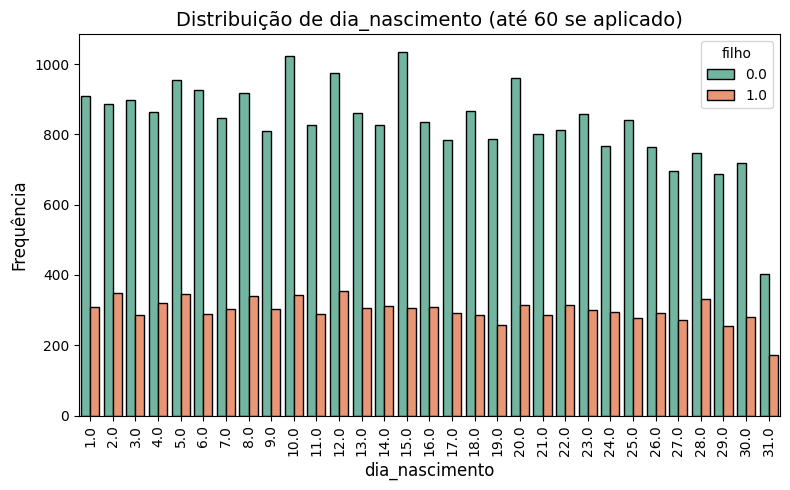

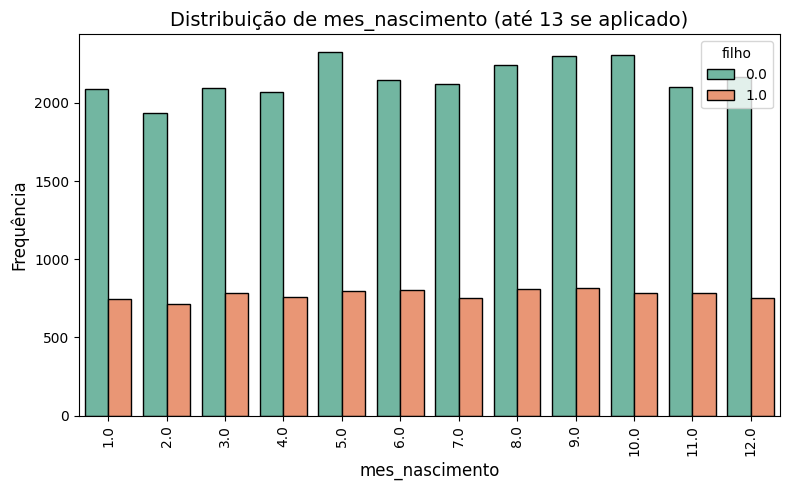

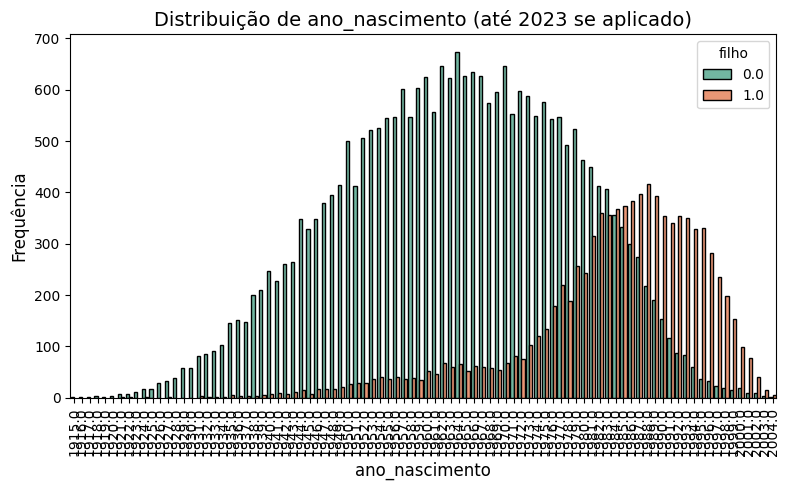

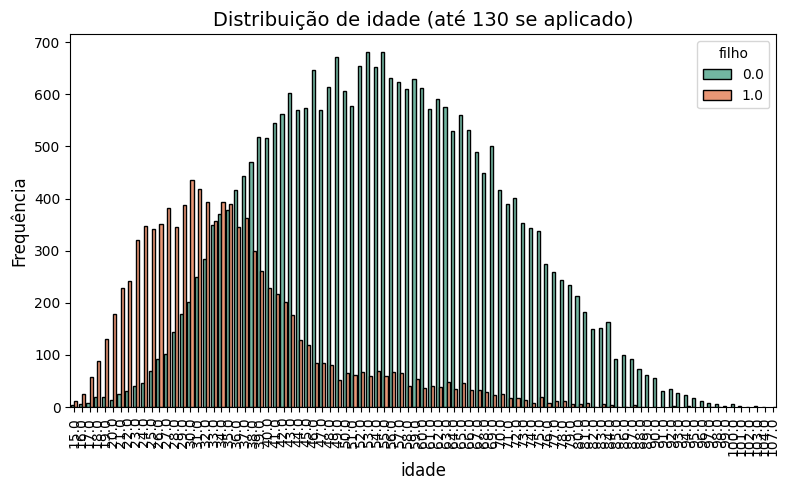

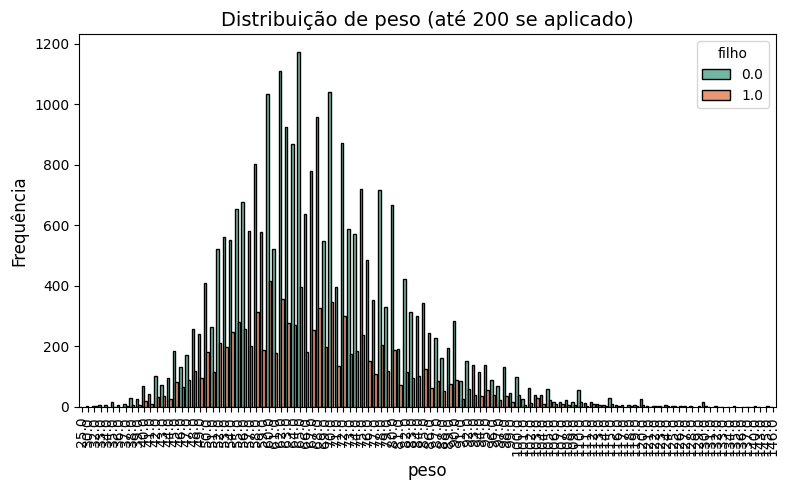

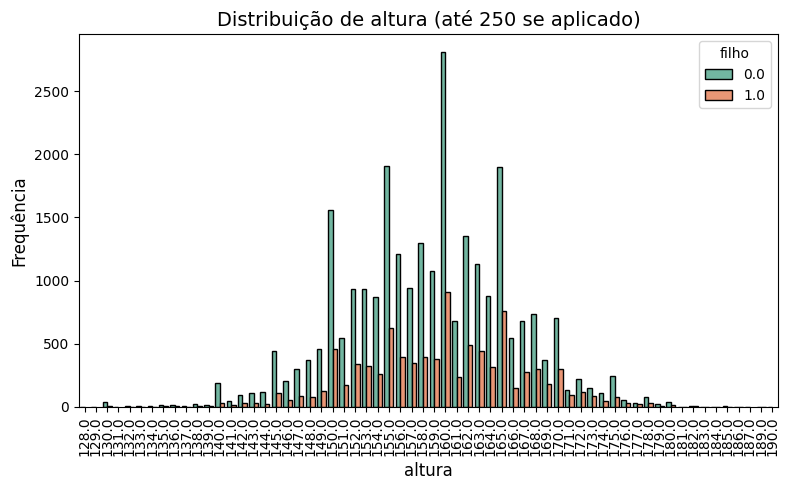

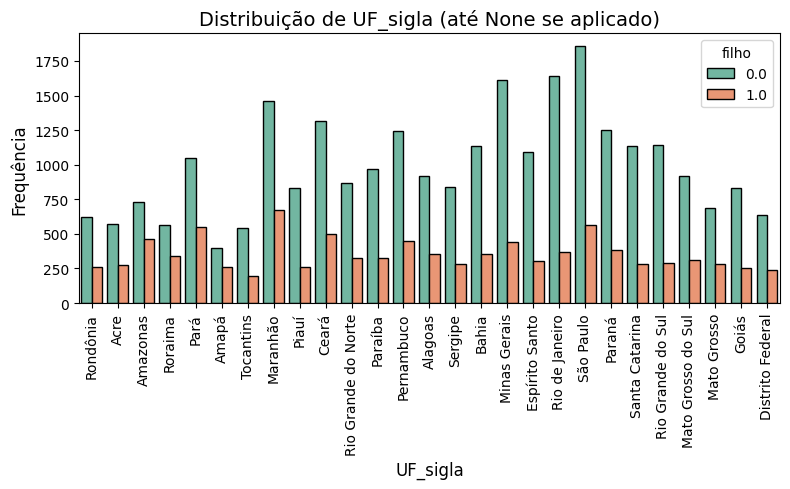

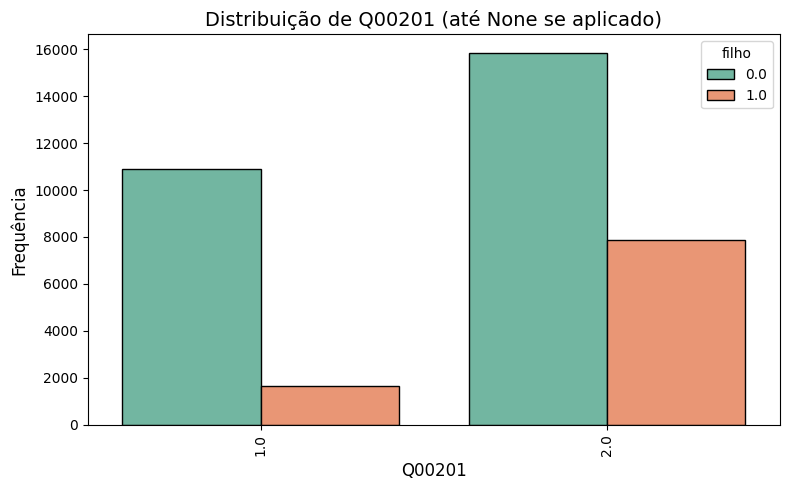

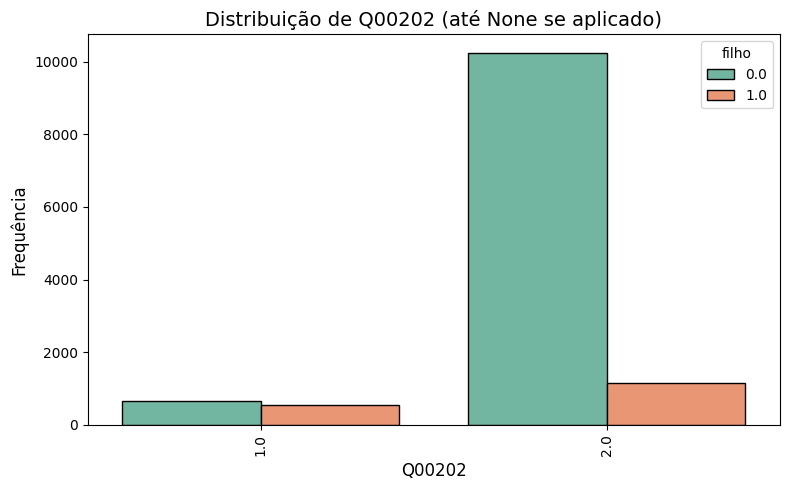

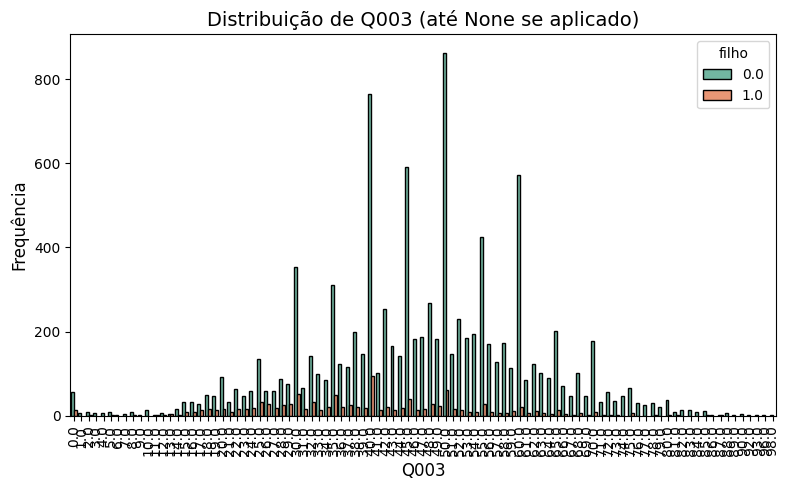

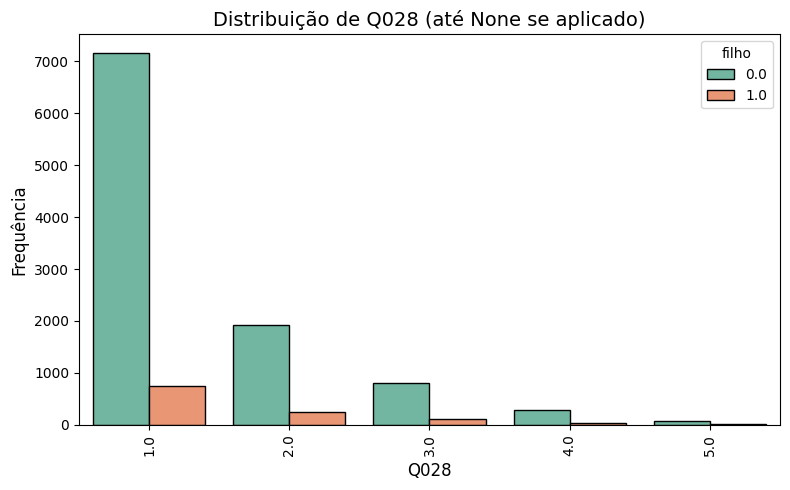

In [ ]:
# Dicionário com colunas e seus respectivos limites
columns_limits = {
    "dia_nascimento": 60,
    "mes_nascimento": 13,
    "ano_nascimento": 2023,
    "idade": 130,
    "peso": 200,
    "altura": 250,
    "imc": 60,
    "UF_sigla": None,
    'G046': None,
    'G049': None,
    'G051': None,
    'G053': None,
    'G059': None,
    'G060': None,
    'G062': None,
    'G064': None,
    'G066': None,
    'G070': None,
    'G072': None,
    'G073': None,
    'G079': None,
    'G083': None,
    'G084': None,
    'P00103': None,
    'P00104': None,
    'P00403': None,
    'P00404': None,
    'Q00201': None,
    'Q00202': None,
    'Q003': None,
    'Q028': None,
    'Q03001': None,
    'Q03002': None,
    'Q031': None,
    'Q055011': None,
    'Q055012': None,
    'Q055013': None,
    'Q060': None,
    'Q061': None,
    'Q06307': None,
    'Q06308': None,
    'Q06309': None,
    'Q06310': None,
    'Q064': None,
    'Q068': None,
    'Q070': None,
    'Q074': None,
    'Q075': None,
    'Q079': None,
    'Q080': None,
    'Q084': None,
    'Q085': None,
    'Q087': None,
    'Q088': None,
    'Q08901': None,
    'Q091': None,
    'Q092': None,
    'Q09301': None,
    'Q109': None,
    'Q11007': None,
    'Q11008': None,
    'Q11009': None,
    'Q111': None,
    'Q11604': None,
    'Q11605': None,
    'Q11606': None,
    'Q11701': None,
    'Q120': None,
    'Q12201': None,
    'Q124': None,
    'Q125': None,
    'R025': None,
    'R026': None,
    'R027': None,
    'R028': None,
    'R029': None,
    'R034': None,
    'R035': None,
    'R03601': None,
    'R037': None,
    'R038': None,
    'S065': None,
    'S066': None,
    'S06701': None,
    'S068': None,
    'S06901': None,
    'S06902': None,
    'S070': None,
    'S082': None,
    'S083': None,
    'S086': None,
    'S087': None,
    'S095': None,
    'S096': None,
    'S098': None,
    'S099': None,
    'S09901': None,
    'S110': None,
    'S11001': None,
    'S112': None,
    'S115': None,
    'S116': None,
    'S117': None,
    'S118': None,
    'S11801': None,
    'S125': None,
    'S126': None,
    'S127': None,
    'S130': None,
    'S131': None,
    'S132': None,
    'S133': None,
    'S134': None,
    'S136': None,
    'W001': None,
    'W00101': None,
    'W00102': None,
    'W00103': None,
    'W00201': None,
    'W00202': None,
    'W00203': None,
    'VDL001': None,
}

# Chamando a função com limites e hue='sexo'
plot_filtered_columns_with_hue(df_grupo, columns_limits, hue="filho")

In [52]:
df_grupo[df_grupo.ano_nascimento>2000]['ano_nascimento'].value_counts(dropna=False)

ano_nascimento
9999.0    1297
2001.0      87
2002.0      50
2003.0      19
2004.0       8
Name: count, dtype: int64